# Контрольное домашнее задание № 1.6
# Вариант14


## Задание
Рассматривается множество проектов $ X = \{x^i, i = 1, N\} $ информационной системы. Каждый проект $ x^i ∈ X $ оценивается векторным показателем эффективности $F(x^i) = [f_1(x^i), f_2(x^i)]^T $, компоненты которого требуется максимизировать.


Множество достижимых векторных оценок $F(X)$ определяется системой ограничений:
$$ F(X) : \begin{cases}
\frac{f_1^2}{4*14^2} + \frac{(f_2 - 14)^2}{14^2} ≤ 1 \\
-f_1 + f_2 ≤ 14 \\
f_1+f_2 ≥ 28\\
\end{cases} \ $$ 

In [172]:
import numpy as np
import matplotlib.pyplot as plt

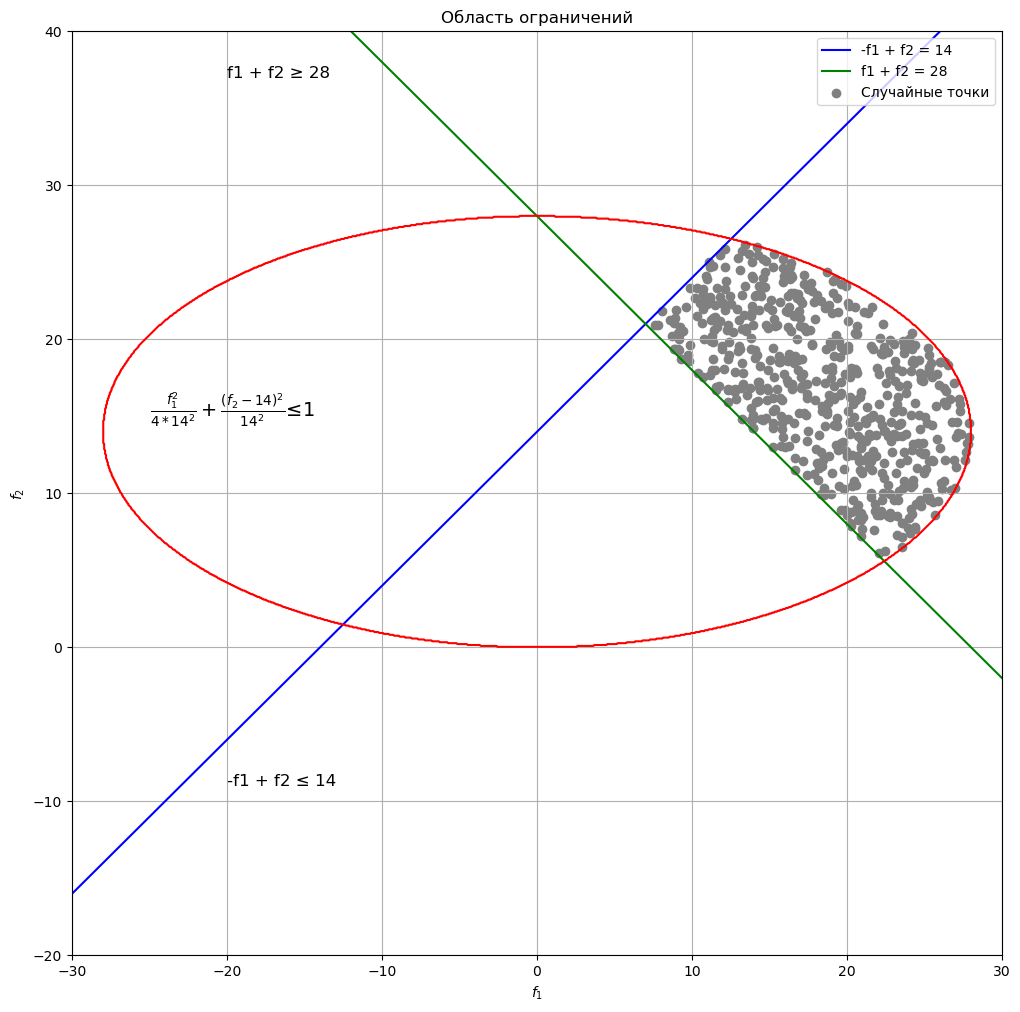

In [173]:
# Создание сетки точек для построения области
f1 = np.linspace(-30, 30, 1000)
f2 = np.linspace(-20, 40, 1000)
F1, F2 = np.meshgrid(f1, f2)

# Определение функций ограничений
constraint1 = (F1**2)/(4*14**2) + ((F2 - 14)**2)/(14**2) <= 1
constraint2 = -F1 + F2 <= 14
constraint3 = F1 + F2 >= 28

# Построение области ограничений
plt.figure(figsize=(12, 12))

plt.plot(f1, 14 + f1, 'b', label='-f1 + f2 = 14')
plt.plot(f1, 28 - f1, 'g', label='f1 + f2 = 28')

# Добавление окружности как линии
circle_mask = np.zeros_like(F1, dtype=bool)
for i in range(F1.shape[0]):
    for j in range(F1.shape[1]):
        if constraint1[i, j]:
            circle_mask[i, j] = True
plt.contour(F1, F2, circle_mask, levels=[0.5], colors='r')

# Определение точек, удовлетворяющих ограничениям
feasible_points = np.logical_and.reduce((constraint1, constraint2, constraint3))
feasible_f1 = F1[feasible_points]
feasible_f2 = F2[feasible_points]

plt.xlim(-30, 30)
plt.ylim(-20, 40)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.title('Область ограничений')

# Добавление подписей к критериям
plt.text(-20, -9, '-f1 + f2 ≤ 14', fontsize=12)
plt.text(-20, 37, 'f1 + f2 ≥ 28', fontsize=12)
plt.text(-25, 15, r'$\frac{f_1^2}{4*14^2} + \frac{(f_2 - 14)^2}{14^2} ≤ 1$', fontsize=14)

# Вручную задаем количество точек, которые будут случайным образом выбираться из допустимой области
num_points = 600

# Генерация случайных индексов для выбора точек
random_indices = np.random.choice(np.arange(len(feasible_f1)), size=num_points, replace=False)

# Выбор случайных точек из допустимой области
random_points_f1 = feasible_f1[random_indices]
random_points_f2 = feasible_f2[random_indices]

# Построение случайных точек
plt.scatter(random_points_f1, random_points_f2, color='gray', label='Случайные точки')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Требуется определить оптимальный по Парето проект $x^* ∈ X$, используя
следующие методы.

In [174]:
# Функция поиска оптимальных точек по Парето
def pareto(points):
    num_points = len(points)
    pareto_status = np.ones(num_points, dtype=int)
    for i in range(num_points):
        for j in range(num_points):
            if i != j and pareto_status[j] != -1:
                if points[j][0] <= points[i][0] and points[j][1] <= points[i][1]:
                    pareto_status[j] = -1
    pareto_points = points[pareto_status != -1]
    return pareto_points


In [175]:
# Находим оптимальные точки по Парето среди случайно выбранных точек
pareto_optimal_points = pareto(np.column_stack((random_points_f1, random_points_f2)))

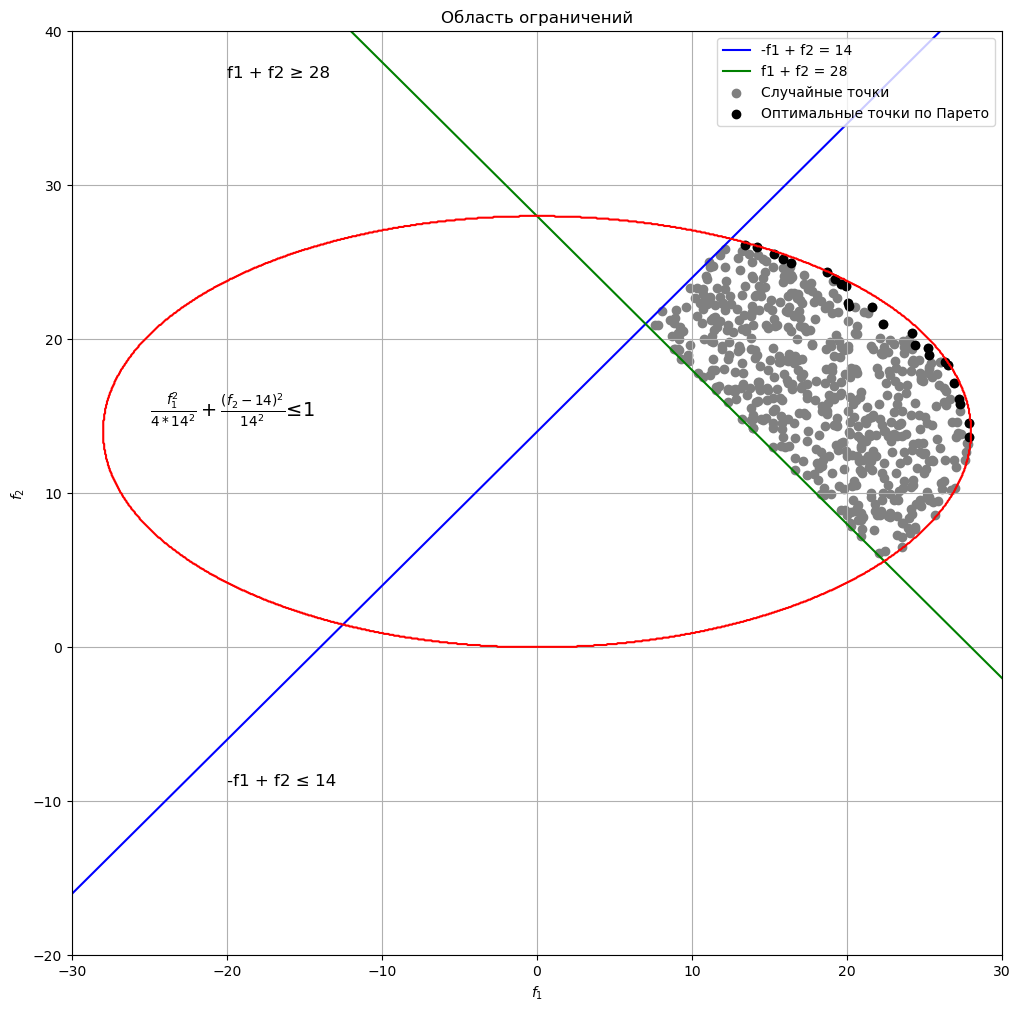

In [176]:
# Создание сетки точек для построения области
f1 = np.linspace(-30, 30, 1000)
f2 = np.linspace(-20, 40, 1000)
F1, F2 = np.meshgrid(f1, f2)

# Определение функций ограничений
constraint1 = (F1**2)/(4*14**2) + ((F2 - 14)**2)/(14**2) <= 1
constraint2 = -F1 + F2 <= 14
constraint3 = F1 + F2 >= 28

# Построение области ограничений
plt.figure(figsize=(12, 12))

plt.plot(f1, 14 + f1, 'b', label='-f1 + f2 = 14')
plt.plot(f1, 28 - f1, 'g', label='f1 + f2 = 28')

# Добавление окружности как линии
circle_mask = np.zeros_like(F1, dtype=bool)
for i in range(F1.shape[0]):
    for j in range(F1.shape[1]):
        if constraint1[i, j]:
            circle_mask[i, j] = True
plt.contour(F1, F2, circle_mask, levels=[0.5], colors='r')

# Определение точек, удовлетворяющих ограничениям
feasible_points = np.logical_and.reduce((constraint1, constraint2, constraint3))
feasible_f1 = F1[feasible_points]
feasible_f2 = F2[feasible_points]

plt.xlim(-30, 30)
plt.ylim(-20, 40)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.title('Область ограничений')

# Добавление подписей к критериям
plt.text(-20, -9, '-f1 + f2 ≤ 14', fontsize=12)
plt.text(-20, 37, 'f1 + f2 ≥ 28', fontsize=12)
plt.text(-25, 15, r'$\frac{f_1^2}{4*14^2} + \frac{(f_2 - 14)^2}{14^2} ≤ 1$', fontsize=14)

# Построение случайных точек
plt.scatter(random_points_f1, random_points_f2, color='gray', label='Случайные точки')

# Построение оптимальных точек
plt.scatter(pareto_optimal_points[:, 0], pareto_optimal_points[:, 1], color='black', label='Оптимальные точки по Парето')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### 1. Метод обобщенной функции. В качестве обобщенной функции использовать линейую свертку. 
Решить задачу для вариантов:

 a) $ μ_1 = 0.2; μ_2 = 0.8 ; $

 b) $ μ_1 = 0.3; μ_2 = 0.7 ;$

 c) $ μ_1 = 0.7; μ_2 = 0.3 .$

Для решения задачи оптимального по Парето проекта с использованием метода обобщенной функции и линейной свертки, нам необходимо задать обобщенную функцию, которая будет учитывать веса $μ_1$ и $μ_2$.

Обобщенная функция $G(F_1, F_2)$ может быть определена как линейная свертка двух критериев с весами $μ_1$ и $μ_2$:

$$G(F_1, F_2) = μ_1 * F_1 + μ_2 * F_2$$

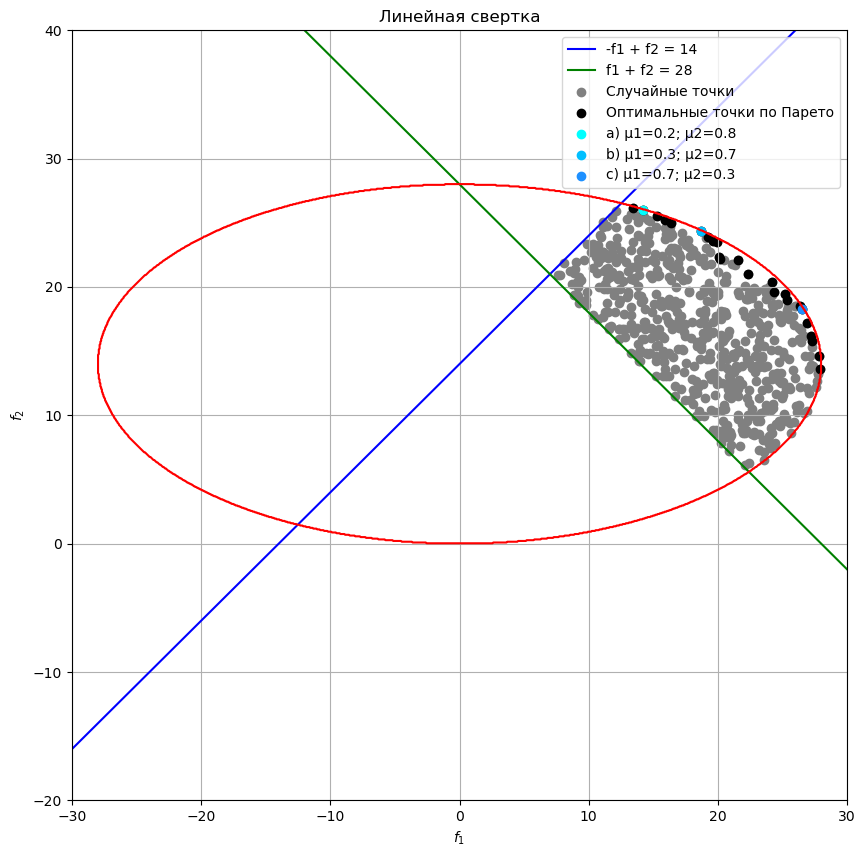

a) Максимум = 23.645645645645644
b) Максимум = 22.681681681681678
c) Максимум = 24.057057057057058


In [177]:

plt.figure(figsize=(10, 10))
plt.plot(f1, 14 + f1, 'b', label='-f1 + f2 = 14')
plt.plot(f1, 28 - f1, 'g', label='f1 + f2 = 28')
plt.contour(F1, F2, constraint1, levels=[0.5], colors='r')
plt.scatter(random_points_f1, random_points_f2, color='gray', label='Случайные точки')

pareto_optimal_points = pareto(np.column_stack((random_points_f1, random_points_f2)))
# График для варианта a) μ1=0.2; μ2=0.8;
max_values_a = np.max(pareto_optimal_points[:, 0] * 0.2 + pareto_optimal_points[:, 1] * 0.8)
max_point_a = pareto_optimal_points[np.argmax(pareto_optimal_points[:, 0] * 0.2 + pareto_optimal_points[:, 1] * 0.8)]

# График для варианта b) μ1=0.3; μ2=0.7;
max_values_b = np.max(pareto_optimal_points[:, 0] * 0.3 + pareto_optimal_points[:, 1] * 0.7)
max_point_b = pareto_optimal_points[np.argmax(pareto_optimal_points[:, 0] * 0.3 + pareto_optimal_points[:, 1] * 0.7)]

# График для варианта c) μ1=0.7; μ2=0.3;
max_values_c = np.max(pareto_optimal_points[:, 0] * 0.7 + pareto_optimal_points[:, 1] * 0.3)
max_point_c = pareto_optimal_points[np.argmax(pareto_optimal_points[:, 0] * 0.7 + pareto_optimal_points[:, 1] * 0.3)]

plt.scatter(pareto_optimal_points[:, 0], pareto_optimal_points[:, 1], color='black', label='Оптимальные точки по Парето')
plt.scatter(max_point_a[0], max_point_a[1], color='cyan', label='a) μ1=0.2; μ2=0.8')
plt.scatter(max_point_b[0], max_point_b[1], color='deepskyblue', label='b) μ1=0.3; μ2=0.7')
plt.scatter(max_point_c[0], max_point_c[1], color='dodgerblue', label='c) μ1=0.7; μ2=0.3')

plt.xlim(-30, 30)
plt.ylim(-20, 40)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.legend(loc='upper right')
plt.title('Линейная свертка'.format(max_values_a))
plt.grid(True)
plt.show()

print(f'a) Максимум = {max_values_a}\nb) Максимум = {max_values_b}\nc) Максимум = {max_values_c}')

### 2. Метод обобщенной функции. В качестве обобщенной функции использовать функцию Гермейера.

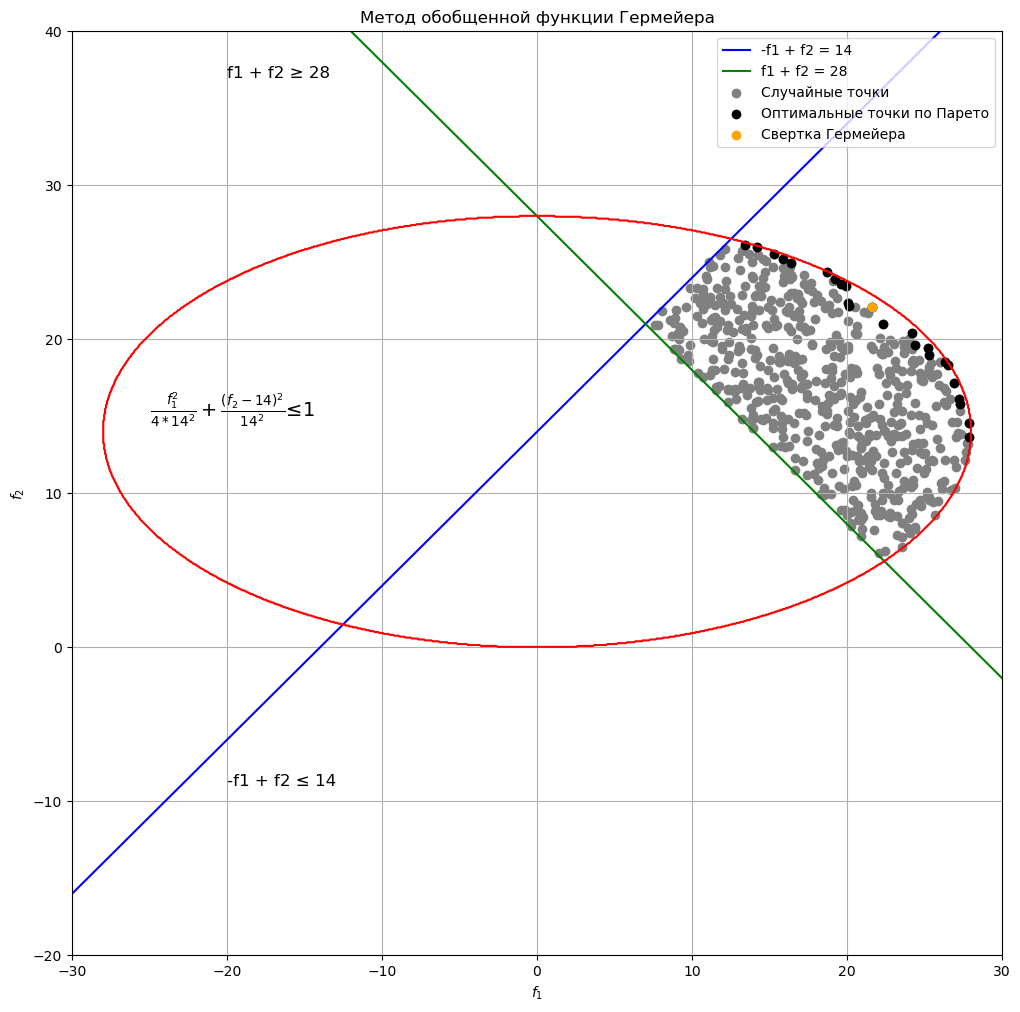

In [178]:
# Создание сетки точек для построения области
f1 = np.linspace(-30, 30, 1000)
f2 = np.linspace(-20, 40, 1000)
F1, F2 = np.meshgrid(f1, f2)

# Определение функций ограничений
constraint1 = (F1**2)/(4*14**2) + ((F2 - 14)**2)/(14**2) <= 1
constraint2 = -F1 + F2 <= 14
constraint3 = F1 + F2 >= 28

# Построение области ограничений
plt.figure(figsize=(12, 12))

plt.plot(f1, 14 + f1, 'b', label='-f1 + f2 = 14')
plt.plot(f1, 28 - f1, 'g', label='f1 + f2 = 28')

# Добавление окружности как линии
circle_mask = np.zeros_like(F1, dtype=bool)
for i in range(F1.shape[0]):
    for j in range(F1.shape[1]):
        if constraint1[i, j]:
            circle_mask[i, j] = True
plt.contour(F1, F2, circle_mask, levels=[0.5], colors='r')

plt.xlim(-30, 30)
plt.ylim(-20, 40)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.title('Метод обобщенной функции Гермейера')

# Добавление подписей к критериям
plt.text(-20, -9, '-f1 + f2 ≤ 14', fontsize=12)
plt.text(-20, 37, 'f1 + f2 ≥ 28', fontsize=12)
plt.text(-25, 15, r'$\frac{f_1^2}{4*14^2} + \frac{(f_2 - 14)^2}{14^2} ≤ 1$', fontsize=14)

# Вычисление свертки Гермейера и выбор соответствующей точки
germeier_convolution = np.minimum(pareto_optimal_points[:, 0], pareto_optimal_points[:, 1])
germeier_index = np.argmax(germeier_convolution)
germeier_point = pareto_optimal_points[germeier_index]

plt.scatter(random_points_f1, random_points_f2, color='gray', label='Случайные точки')

# Построение оптимальных точек
plt.scatter(pareto_optimal_points[:, 0], pareto_optimal_points[:, 1], color='black', label='Оптимальные точки по Парето')

# Построение точки свертки Гермейера
plt.scatter(germeier_point[0], germeier_point[1], color='orange', label='Свертка Гермейера')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### 3. Метод главного критерия (пороговой оптимизации). 
Решить задачу для вариантов:

a) $f_1$ - главный критерий; $γ_2 = 1.8*14 (= 25.2)$

b) $f_2$ - главный критерий; $y_1 = 1.4*14 (=19.6)$

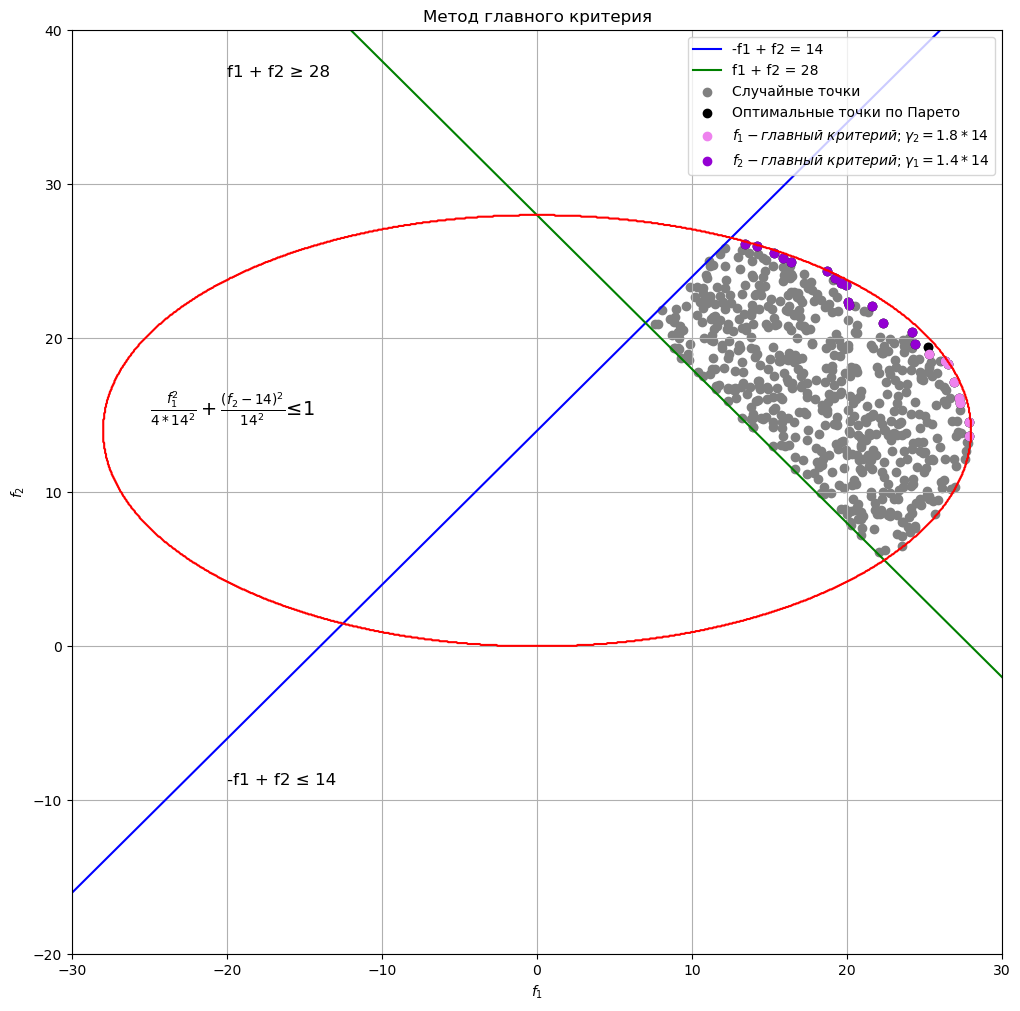

In [179]:
# Создание сетки точек для построения области
f1 = np.linspace(-30, 30, 1000)
f2 = np.linspace(-20, 40, 1000)
F1, F2 = np.meshgrid(f1, f2)

# Определение функций ограничений
constraint1 = (F1**2)/(4*14**2) + ((F2 - 14)**2)/(14**2) <= 1
constraint2 = -F1 + F2 <= 14
constraint3 = F1 + F2 >= 28

# Построение области ограничений
plt.figure(figsize=(12, 12))

plt.plot(f1, 14 + f1, 'b', label='-f1 + f2 = 14')
plt.plot(f1, 28 - f1, 'g', label='f1 + f2 = 28')

# Добавление окружности как линии
circle_mask = np.zeros_like(F1, dtype=bool)
for i in range(F1.shape[0]):
    for j in range(F1.shape[1]):
        if constraint1[i, j]:
            circle_mask[i, j] = True
plt.contour(F1, F2, circle_mask, levels=[0.5], colors='r')


plt.xlim(-30, 30)
plt.ylim(-20, 40)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.title('Метод главного критерия')

# Добавление подписей к критериям
plt.text(-20, -9, '-f1 + f2 ≤ 14', fontsize=12)
plt.text(-20, 37, 'f1 + f2 ≥ 28', fontsize=12)
plt.text(-25, 15, r'$\frac{f_1^2}{4*14^2} + \frac{(f_2 - 14)^2}{14^2} ≤ 1$', fontsize=14)

# Построение случайных точек
plt.scatter(random_points_f1, random_points_f2, color='gray', label='Случайные точки')

# Построение оптимальных точек
plt.scatter(pareto_optimal_points[:, 0], pareto_optimal_points[:, 1], color='black', label='Оптимальные точки по Парето')

# Пороговая оптимизация a
gamma2 = 1.8 * 14
thresholded_points_a = pareto_optimal_points[pareto_optimal_points[:, 0] >= gamma2]

# Построение точек пороговой оптимизации
plt.scatter(thresholded_points_a[:, 0], thresholded_points_a[:, 1], color='violet', label=r'$f_1 - главный\ критерий; γ_2 = 1.8*14$')

# Пороговая оптимизация b
gamma1 = 1.4 * 14

# Пороговая оптимизация
thresholded_points_b = pareto_optimal_points[pareto_optimal_points[:, 1] >= gamma1]

# Построение точек пороговой оптимизации
plt.scatter(thresholded_points_b[:, 0], thresholded_points_b[:, 1], color='darkviolet', label=r'$f_2 - главный\ критерий; γ_1 = 1.4*14$')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### 4. Метод «идеальной точки»
Для формирования исходных данных сгенерировать случайным образом в пространстве критериев $(f_1, f_2) N = 500$ точек, равномерно распределенных на множестве достижимых векторных оценок $F(X)$

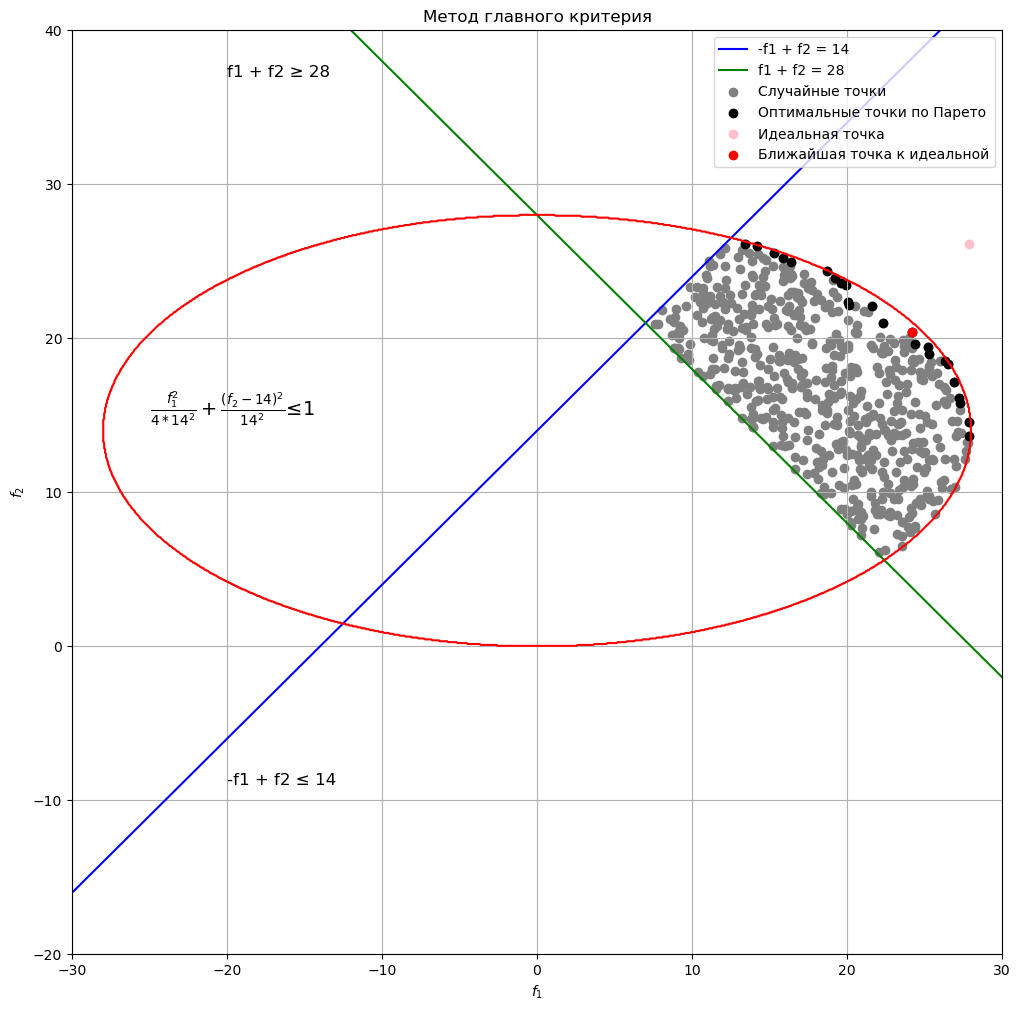

In [180]:
# Создание сетки точек для построения области
f1 = np.linspace(-30, 30, 1000)
f2 = np.linspace(-20, 40, 1000)
F1, F2 = np.meshgrid(f1, f2)

# Определение функций ограничений
constraint1 = (F1**2)/(4*14**2) + ((F2 - 14)**2)/(14**2) <= 1
constraint2 = -F1 + F2 <= 14
constraint3 = F1 + F2 >= 28

# Построение области ограничений
plt.figure(figsize=(12, 12))

plt.plot(f1, 14 + f1, 'b', label='-f1 + f2 = 14')
plt.plot(f1, 28 - f1, 'g', label='f1 + f2 = 28')

# Добавление окружности как линии
circle_mask = np.zeros_like(F1, dtype=bool)
for i in range(F1.shape[0]):
    for j in range(F1.shape[1]):
        if constraint1[i, j]:
            circle_mask[i, j] = True
plt.contour(F1, F2, circle_mask, levels=[0.5], colors='r')


plt.xlim(-30, 30)
plt.ylim(-20, 40)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.title('Метод главного критерия')

# Добавление подписей к критериям
plt.text(-20, -9, '-f1 + f2 ≤ 14', fontsize=12)
plt.text(-20, 37, 'f1 + f2 ≥ 28', fontsize=12)
plt.text(-25, 15, r'$\frac{f_1^2}{4*14^2} + \frac{(f_2 - 14)^2}{14^2} ≤ 1$', fontsize=14)

# Построение случайных точек
plt.scatter(random_points_f1, random_points_f2, color='gray', label='Случайные точки')

# Построение оптимальных точек
plt.scatter(pareto_optimal_points[:, 0], pareto_optimal_points[:, 1], color='black', label='Оптимальные точки по Парето')

# Вычисление идеальной точки
ideal_point = np.max(pareto_optimal_points, axis=0)

# Поиск ближайшей точки к идеальной точке
distance_to_ideal = np.linalg.norm(pareto_optimal_points - ideal_point, axis=1)
closest_index = np.argmin(distance_to_ideal)
closest_point = pareto_optimal_points[closest_index]

# Построение идеальной точки
plt.scatter(ideal_point[0], ideal_point[1], color='pink', label='Идеальная точка')
plt.scatter(closest_point[0], closest_point[1], color='red', label='Ближайшая точка к идеальной')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()
